# The Data

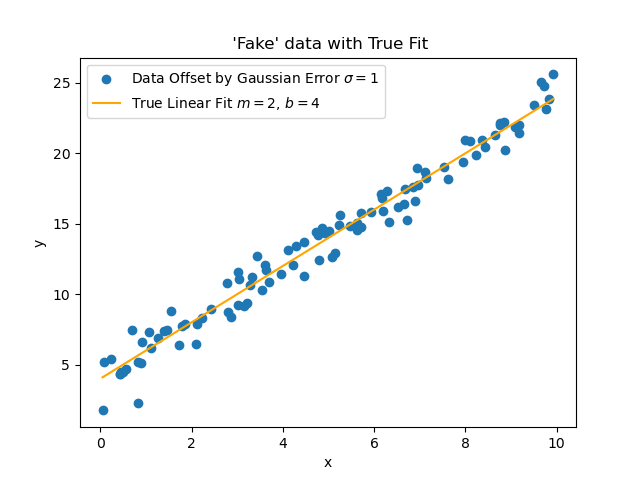

In [1]:
%matplotlib widget

import dynesty
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(141)

# true model is described by two parameters: m and b
m_true = 2
b_true = 4
N = 100
sigma = 1 # defines the width of the normal distribution from which the errors in y are drawn

#find the true points on the line
x = np.sort(10*np.random.rand(N)) # random x values between 0 and 10
y = m_true*x + b_true # true y values for each x
y_error = np.random.normal(loc=0, scale=sigma, size = N) # draw vector of N points from normal distribution with width sigma
y_new = y + y_error

plt.scatter(x, y_new,label='Data Offset by Gaussian Error $\sigma=$' + str(sigma))
plt.plot(x,y,"orange",label='True Linear Fit $m=$' + str(m_true) + ', $b=$' + str(b_true)) #true model
plt.xlabel('x')
plt.ylabel('y')
plt.title(' \'Fake\' data with True Fit')
plt.legend()

# Linear Fit

## Free Parameters ($m$ and $b$)

In [2]:
import scipy.stats as sts

def model(x,m,b):
    model = m*x + b
    return model

def prior_transform(utheta): #parameter theta drawn uniform distribution between zero and one.
    um, ub = utheta
    m = 10*um #prior: m is between 0 and 10
    b = 10*ub #prior: b is between 0 and 10
    return m, b

def lnlike(params): #same parameter function?
    m,b = params
    y_val = model(x,m,b)
    return sum(sts.norm.logpdf(y_new, loc=y_val, scale=sigma))


dsampler = dynesty.DynamicNestedSampler(lnlike, prior_transform, ndim=2)
dsampler.run_nested()
dresults = dsampler.results


23775it [01:15, 313.85it/s, batch: 12 | bound: 61 | nc: 1 | ncall: 56592 | eff(%): 42.011 | loglstar: -146.767 < -139.556 < -139.899 | logz: -148.011 +/-  0.172 | stop:  0.955]      


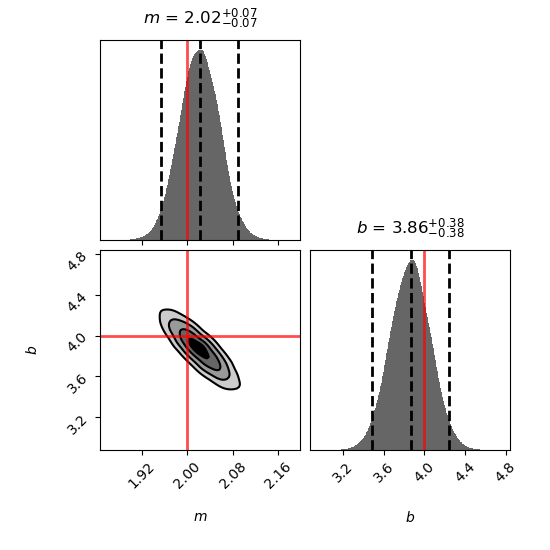

In [3]:
from dynesty import plotting as dyplot
from numpy import *

fig, axes = dyplot.cornerplot(dresults, truths=[m_true,b_true], show_titles=True,title_kwargs={'y': 1.04}, labels=['$m$','$b$'])
# plt.savefig('corner-plot-linear.png')

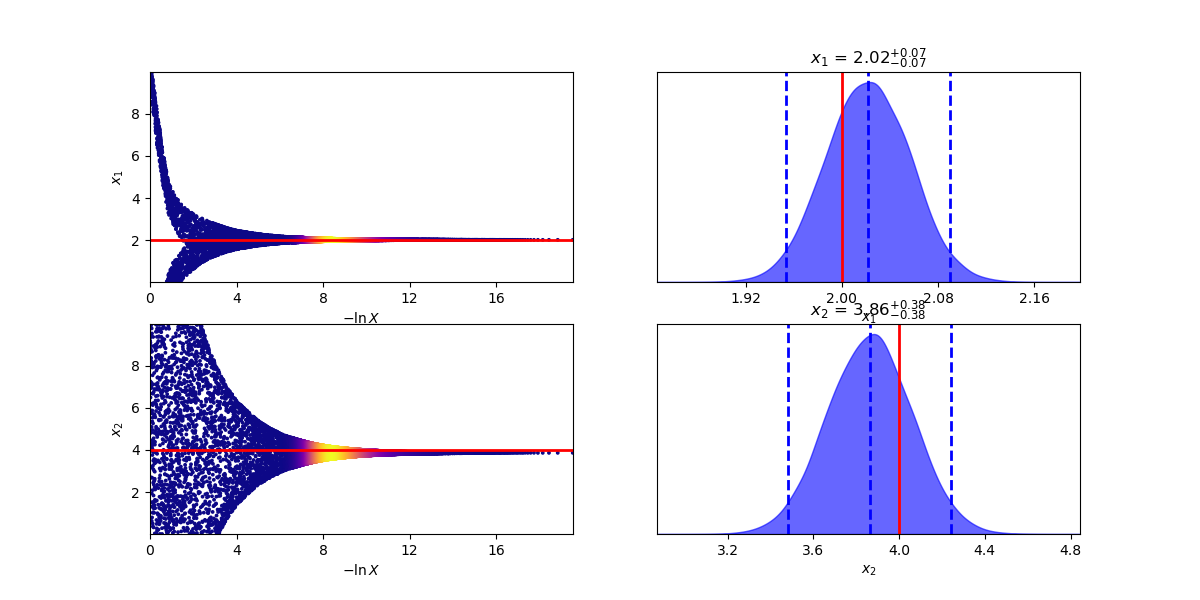

In [106]:
fig, axes = dyplot.traceplot(dsampler.results, truths=[m_true,b_true], show_titles=True)
# plt.savefig('traceplot-linear.png')

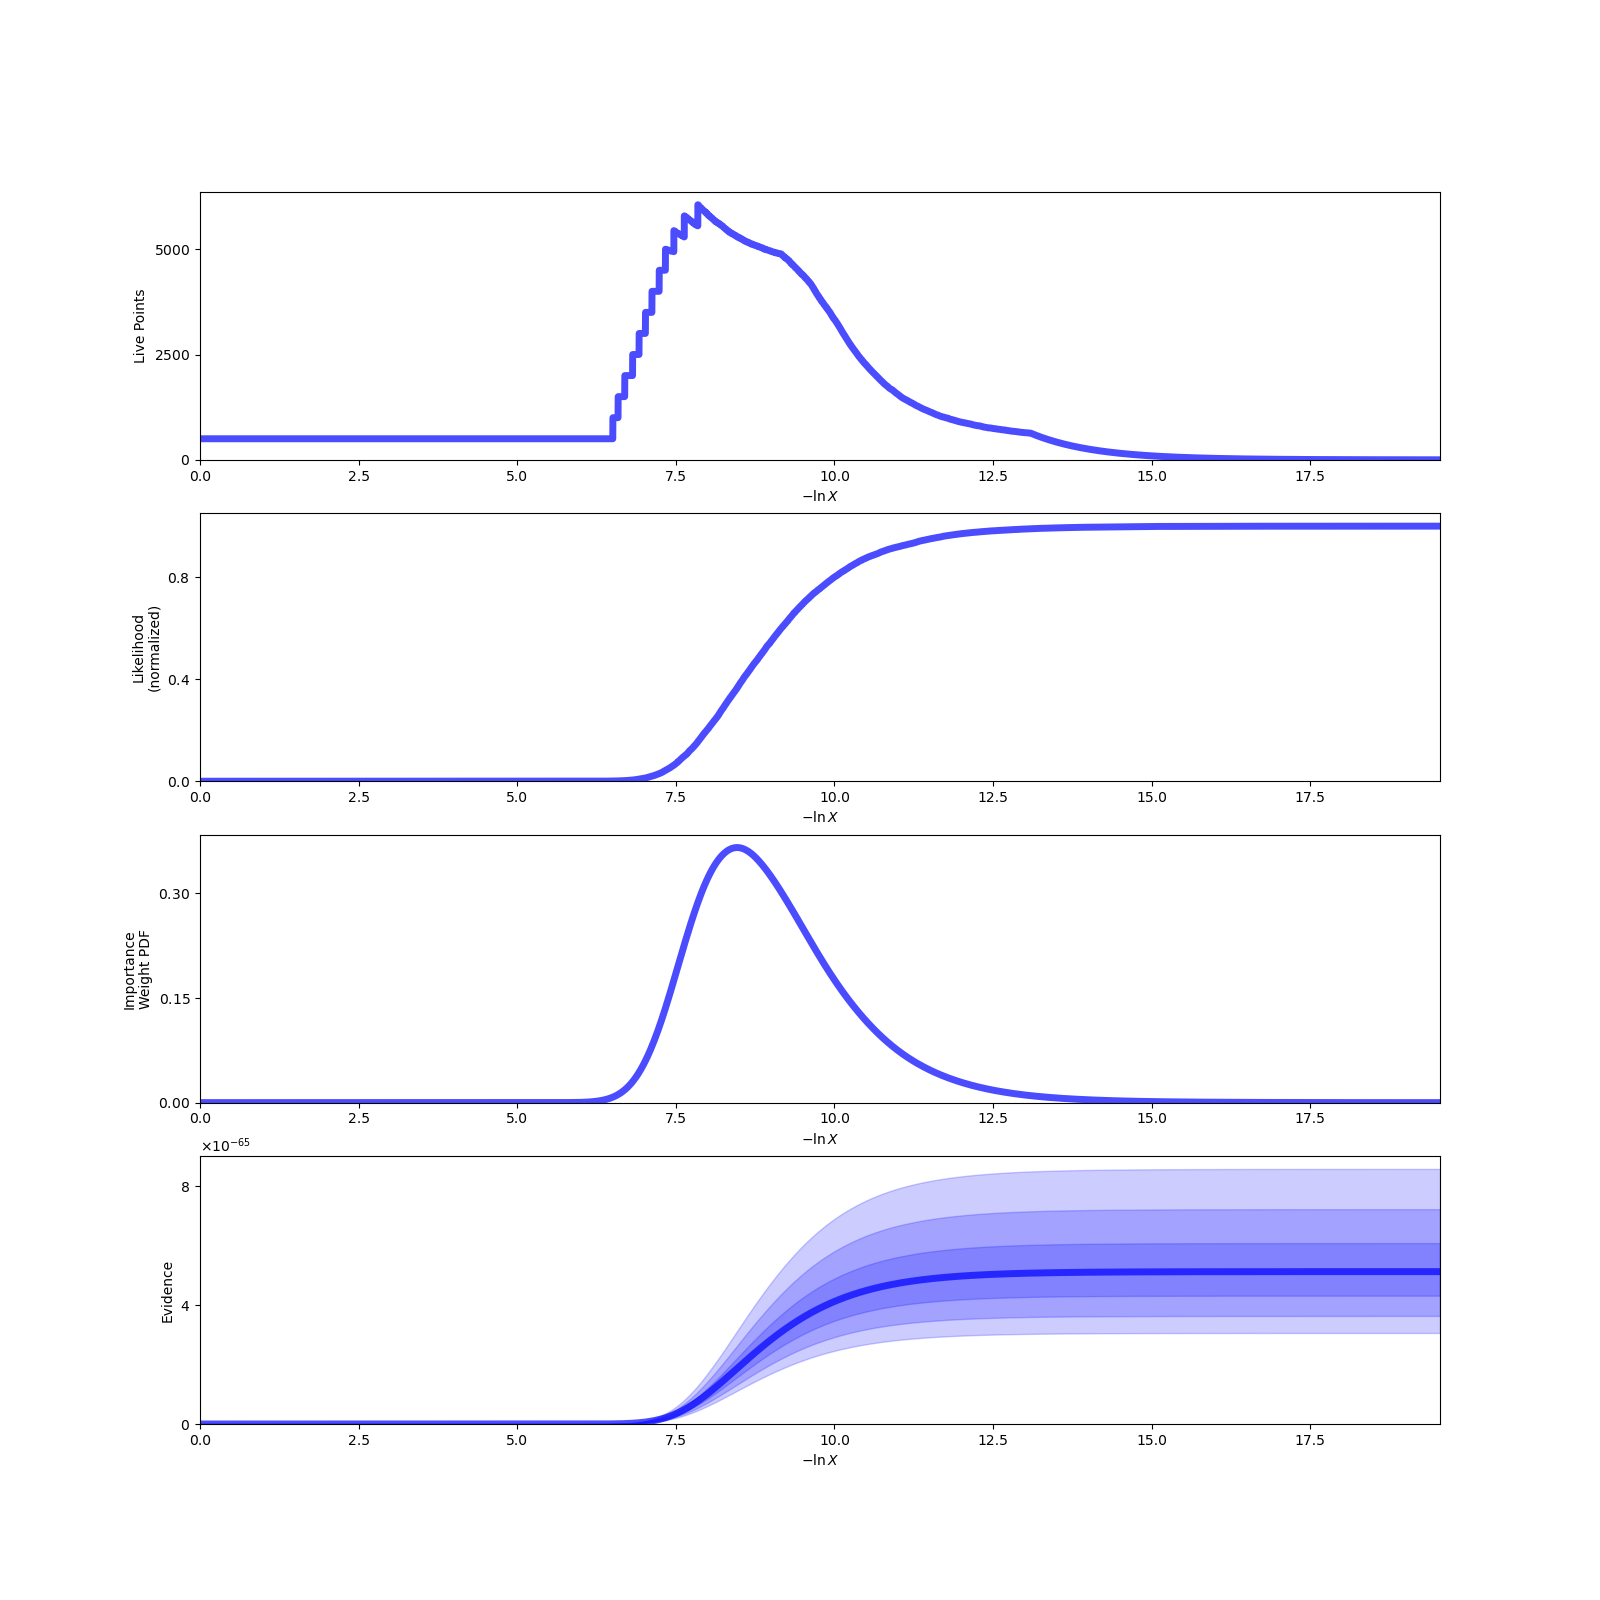

In [6]:
fix, axes = dyplot.runplot(dresults)

In [4]:
lnZ = dresults.logz[-1] #select last element of cumulative log z array
lnZ_err = dresults.logzerr[-1] #select last element of cumulative log z error array

print("log(Z) = {} ± {}".format(lnZ, lnZ_err))

log(Z) = -148.03401616108778 ± 0.17173176872245605


## Fixed Parameters

### $m=2$ and $b=3$

In [15]:
m = 2
b = 3

y_val = m*x + b

sum(sts.norm.logpdf(y_new, loc=y_val, scale=sigma))


-186.39182082894726

### $m = 2.1$ and $b=4$

In [13]:
m = 2.1
b = 4

y_val = m*x + b

sum(sts.norm.logpdf(y_new, loc=y_val, scale=sigma))

-155.3640680059568

# Zeroth-order Fit

In [9]:
import scipy.stats as sts

def model_zeroth(x,b):
    model = b
    return model

def prior_transform_zeroth(utheta): #parameter theta drawn uniform distribution between zero and one.
    ub = utheta
    b = 30*ub #prior: b is between 0 and 30
    return b

def lnlike_zeroth(params): #same parameter function?
    b = params
    y_val = model_zeroth(x,b)
    return sum(sts.norm.logpdf(y_new, loc=y_val, scale=sigma))


dsampler_zeroth = dynesty.DynamicNestedSampler(lnlike_zeroth, prior_transform_zeroth, ndim=1)
dsampler_zeroth.run_nested()
dresults_zeroth = dsampler_zeroth.results

21752it [01:10, 307.14it/s, batch: 13 | bound: 47 | nc: 1 | ncall: 83633 | eff(%): 26.009 | loglstar: -1836.697 < -1835.681 < -1835.782 | logz: -1840.507 +/-  0.101 | stop:  0.960]   


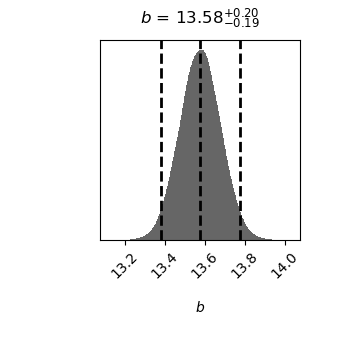

In [107]:
fig, axes = dyplot.cornerplot(dresults_zeroth, truths=[b_true], show_titles=True,title_kwargs={'y': 1.04}, labels=['$b$'])
plt.savefig('corner-plot-zeroth.png')

In [11]:
lnZ_zeroth = dresults_zeroth.logz[-1] #select last element of cumulative log z array
lnZ_err_zeroth = dresults_zeroth.logzerr[-1] #select last element of cumulative log z error array

print("log(Z) = {} ± {}".format(lnZ_zeroth, lnZ_err_zeroth))

log(Z) = -1840.506825443946 ± 0.1010337045657393


# Second order

In [17]:
def model_second(x,a,b,c):
    model = a*x**2 + b*x + c 
    return model

def prior_transform_second(utheta): #parameter theta drawn uniform distribution between zero and one.
    ua, ub, uc = utheta
    a = 10*(2*ua - 1) #prior: a is between -10 and 10
    b = 10*(2*ub-1) #prior: b is between -10 and 10
    c = 10*(2*uc-1) #prior: c is between -10 and 10
    return a, b, c

def lnlike_second(params): #same parameter function?
    a,b,c = params
    y_val = model_second(x,a,b,c)
    return sum(sts.norm.logpdf(y_new, loc=y_val, scale=sigma))


dsampler_second = dynesty.DynamicNestedSampler(lnlike_second, prior_transform_second, ndim=3)
dsampler_second.run_nested()
dresults_second = dsampler_second.results

24129it [01:08, 353.56it/s, batch: 9 | bound: 64 | nc: 2 | ncall: 60836 | eff(%): 39.662 | loglstar: -145.531 < -139.414 < -139.944 | logz: -155.713 +/-  0.239 | stop:  0.928]              


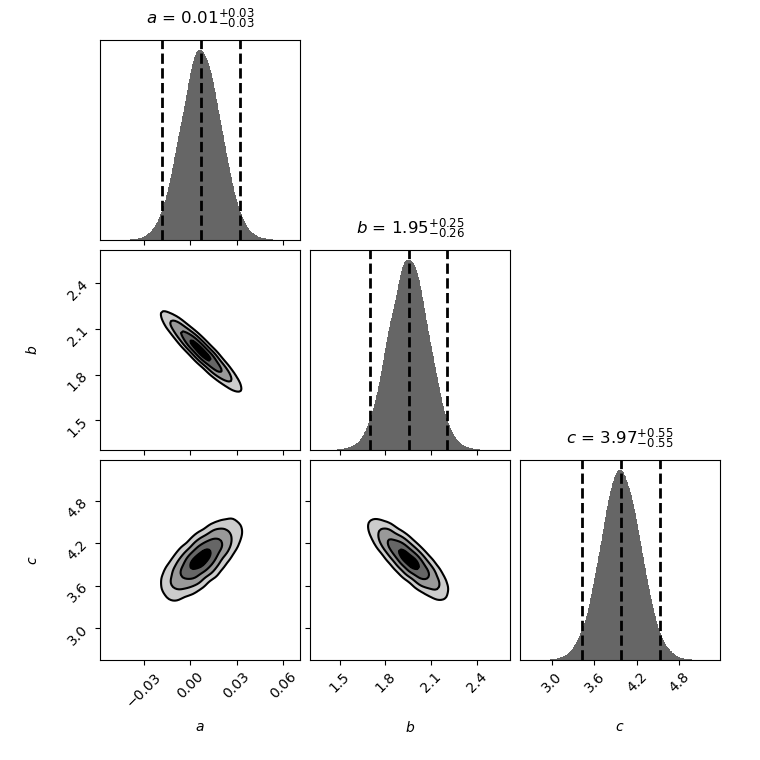

In [108]:
fig, axes = dyplot.cornerplot(dresults_second, show_titles=True,title_kwargs={'y': 1.04}, labels=['$a$','$b$','$c$'])
plt.savefig('corner-plot-quadratic.png')

In [112]:
# select last element of cumulative log z array
lnZ_second = dresults_second.logz[-1]
# select last element of cumulative log z error array
lnZ_err_second = dresults_second.logzerr[-1]

print("log(Z) = {} ± {}".format(lnZ_second, lnZ_err_second))


log(Z) = -155.7169091393395 ± 0.23889464632089508


# Third order

In [113]:
def model_third(x,a,b,c,d):
    model = a*x**3 + b*x**2 + c*x + d 
    return model

def prior_transform_third(utheta): #parameter theta drawn uniform distribution between zero and one.
    ua, ub, uc, ud = utheta
    a = 10*(2*ua - 1) #prior: a is between -10 and 10
    b = 10*(2*ub-1) #prior: b is between -10 and 10
    c = 10*(2*uc-1) #prior: c is between -10 and 10
    d = 10*(2*uc-1) #prior: c is between -10 and 10
    return a, b, c, d

def lnlike_third(params): #same parameter function?
    a,b,c,d = params
    y_val = model_third(x,a,b,c,d)
    return sum(sts.norm.logpdf(y_new, loc=y_val, scale=sigma))


dsampler_third = dynesty.DynamicNestedSampler(lnlike_third, prior_transform_third, ndim=4)
dsampler_third.run_nested()
dresults_third = dsampler_third.results

27997it [01:33, 300.72it/s, batch: 10 | bound: 92 | nc: 1 | ncall: 83988 | eff(%): 33.335 | loglstar: -144.795 < -138.530 < -139.001 | logz: -159.694 +/-  0.276 | stop:  0.887]               


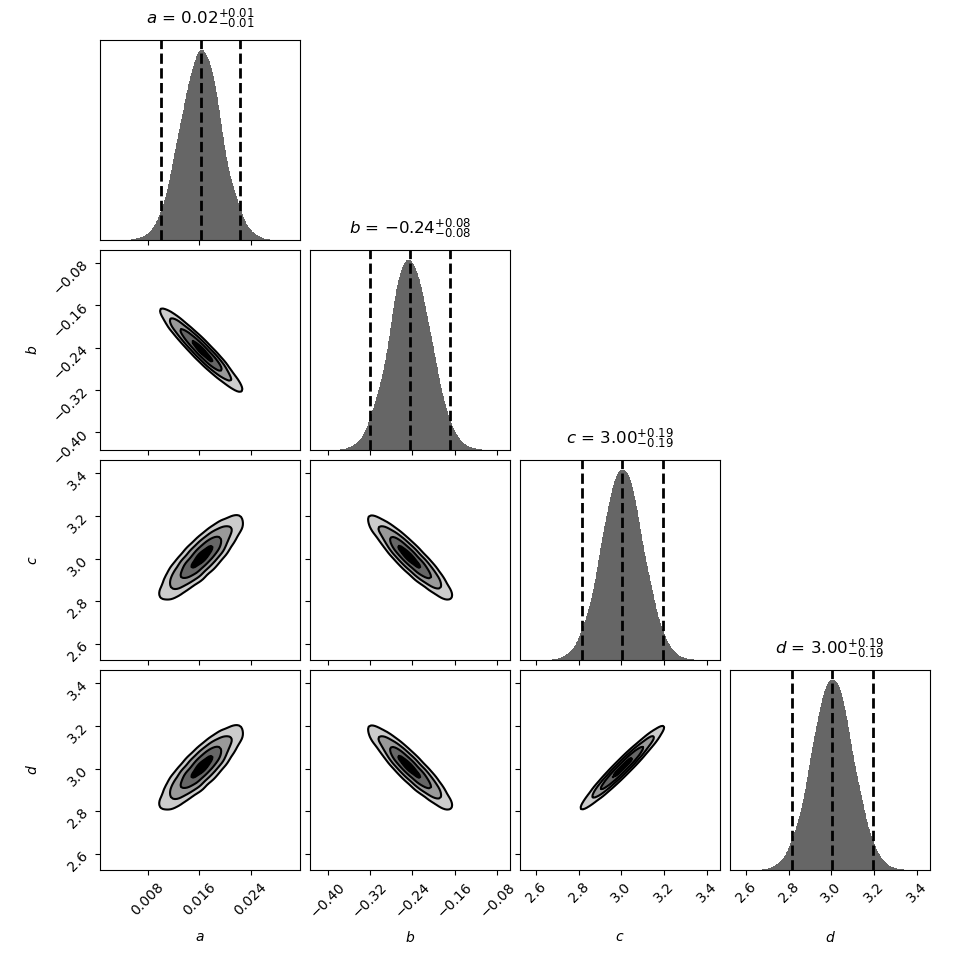

In [115]:
fig, axes = dyplot.cornerplot(dresults_third, show_titles=True, title_kwargs={
                              'y': 1.04}, labels=['$a$', '$b$', '$c$','$d$'])
plt.savefig('corner-plot-cubic.png')

In [116]:
# select last element of cumulative log z array
lnZ_third = dresults_third.logz[-1]
# select last element of cumulative log z error array
lnZ_err_third = dresults_third.logzerr[-1]

print("log(Z) = {} ± {}".format(lnZ_third, lnZ_err_third))

log(Z) = -159.65794032762733 ± 0.2758996459671026


# Bayes Factors

In [117]:
logBayes_m1_m0 = lnZ - lnZ_zeroth
print('log Bayes factor Z_1/Z_0: {0:1.2f}'.format(logBayes_m1_m0))

logBayes_m1_m2 = lnZ - lnZ_second
print('log Bayes factor Z_1/Z_2: {0:1.2f}'.format(logBayes_m1_m2))

logBayes_m1_m3 = lnZ - lnZ_third
print('log Bayes factor Z_1/Z_3: {0:1.2f}'.format(logBayes_m1_m3))

log Bayes factor Z_1/Z_0: 1692.47
log Bayes factor Z_1/Z_2: 7.68
log Bayes factor Z_1/Z_3: 11.62


# Plot of Fits

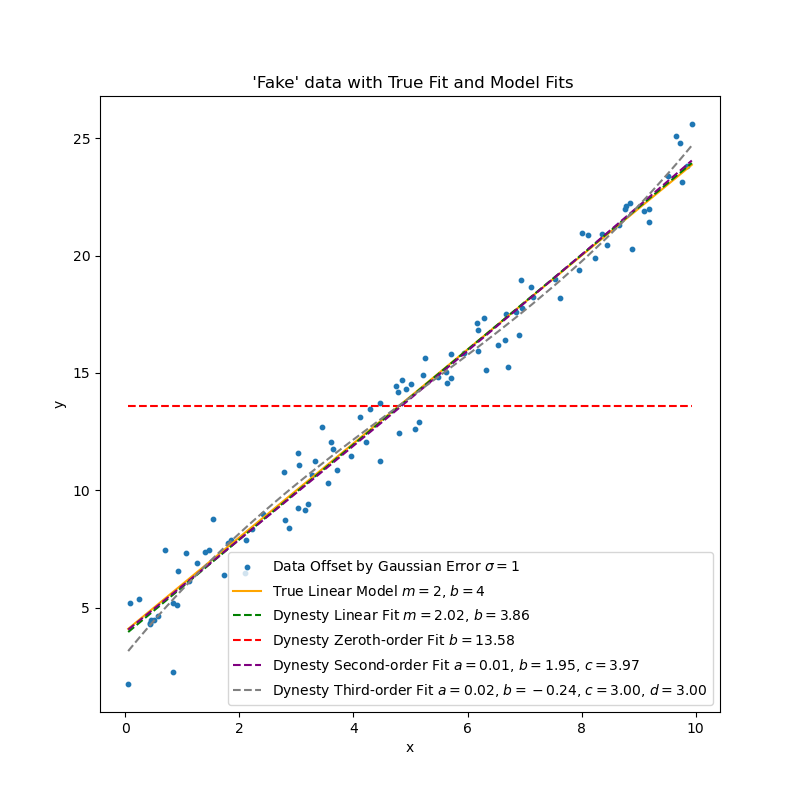

In [121]:
m_linear, b_linear = dresults.samples[-1] # results from linear fit
b_zeroth = (dresults_zeroth.samples[-1])[0] # results from zeroth fit
a_second, b_second, c_second = dresults_second.samples[-1] # results from second fit
a_third, b_third, c_third, d_third = dresults_third.samples[-1] # results from fourth fit

y_linear = m_linear*x + b_linear
y_zeroth = np.ones(len(x))*b_zeroth
y_second = a_second*x**2 + b_second*x + c_second
y_third = a_third*x**3 + b_third*x**2 + c_third*x + d_third

plt.figure(figsize=(8,8))
plt.scatter(x, y_new,label='Data Offset by Gaussian Error $\sigma=$' + str(sigma),s=10)
plt.plot(x,y,"orange",label='True Linear Model $m=$' + str(m_true) + ', $b=$' + str(b_true)) #true model

# linear fit
plt.plot(x,y_linear,"green",linestyle='--',label='Dynesty Linear Fit $m={0:1.2f}$, $b={1:1.2f}$'.format(m_linear,b_linear)) #linear fit
# zeroth fit
plt.plot(x, y_zeroth, "red", linestyle='--',label='Dynesty Zeroth-order Fit $b={0:1.2f}$'.format(b_zeroth))

# second fit
plt.plot(x,y_second,"purple",linestyle='--',label='Dynesty Second-order Fit $a={0:1.2f}$, $b={1:1.2f}$, $c={2:1.2f}$'.format(a_second,b_second,c_second))

# third fit
plt.plot(x,y_third,"grey",linestyle='--',label='Dynesty Third-order Fit $a={0:1.2f}$, $b={1:1.2f}$, $c={2:1.2f}$, $d={3:1.2f}$'.format(a_third,b_third,c_third,d_third))

plt.xlabel('x')
plt.ylabel('y')
plt.title(' \'Fake\' data with True Fit and Model Fits')
plt.legend()
plt.show()
plt.savefig('modelFits.pdf')